### Regresja przy użyciu biblioteki sklearn

Pobierzmy ponownie zbiór znany z poprzednich laboratoriów.

In [1]:
import urllib.request
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plik = 'GDP_happiness.csv'
URL = "https://byes.pl/wp-content/uploads/datasets/" + plik
if not os.path.isfile(plik):
    print('Pobieram plik z ', URL)
    urllib.request.urlretrieve(URL, plik)
    print('Pobrano plik')
else:
    print(f'Plik {plik} już jest na dysku')

dane = pd.read_csv(plik, index_col=[0])
dane = dane.fillna(dane.mean(axis=0))
dane.tail()

display(dane)

X = dane['GDP per capita'].values
Y = dane['happiness'].values

Pobieram plik z  https://byes.pl/wp-content/uploads/datasets/GDP_happiness.csv
Pobrano plik


,GDP per capita,happiness
Belgium,133.000000,6.864
Bulgaria,28.200000,5.102
Czech Republic,67.400000,6.911
Denmark,172.500000,7.646
Germany,133.200000,7.076
Estonia,68.100000,6.022
Ireland,231.900000,7.094
Greece,54.900000,5.515
Spain,84.800000,6.401
France,115.400000,6.664


### Metody z biblioteki [Scikit-learn](https://scikit-learn.org/stable/)

Metody uczenia maszynowego, czy to do klasyfikacji, regresji, grupowania, czy dopasowywania rozkładów do danych, dostępne w bibliotece Scikit-learn nazywane są - nie wiedzieć czemu - *estymatorami*. <br>
Sposób korzystania z każdego estymatora został ujednolicony. Oto przykład regresji liniowej.

In [2]:
from sklearn.linear_model import LinearRegression

2. Utworzenie instancji

In [3]:
model_lin = LinearRegression()

3. Dopasowanie *estymatora* do danych metodą ```fit```: patrz komentarz pod algorytmem (4).

In [4]:
model_lin.fit(X.reshape(-1,1), Y)

LinearRegression()

4. Obliczenia/predykcje z wykorzystaniem metody ```predict``` *estymatora*

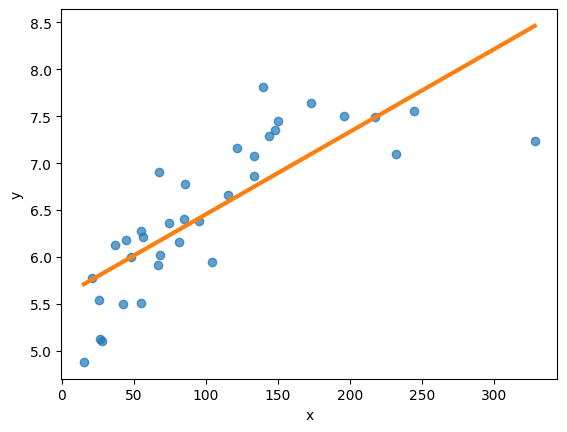

In [5]:
X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
Y_pred = model_lin.predict(X_test.reshape(-1,1))

plt.scatter(X,Y, alpha=0.7)
plt.plot(X_test, Y_pred, color='tab:orange', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Można też sprawdzić wartości parametrów otrzymanego modelu liniowego.

In [6]:
print(f'Parametry modelu liniowego: a = {np.round(model_lin.coef_,5)}, b = {np.round(model_lin.intercept_,5)}')

Parametry modelu liniowego: a = [0.0088], b = 5.57619


Oto inne ważne czynności, które wykonuje się w ramach dopasowywania modelu do danych.

Podział zbioru na część do trenowania i testowania

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(26,) (9,) (26,) (9,)


Wskaźnik jakości modelu:

In [8]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y, model_lin.predict(X.reshape(-1,1)))

0.22434100888001982

**Ćwiczenie 1:** Korzystając z dokumentacji sklearn oblicz dla powyższych danych pierwiastek błędu średniokwadratowego (ang. root mean square error).

In [10]:
root_mean_square_error = np.sqrt(mean_squared_error(Y, model_lin.predict(X.reshape(-1,1))))
print(f'{root_mean_square_error=}')

root_mean_square_error=0.4736465020244737


Oto **przykład** demonstrujący jednolitość obsługi *estymatorów* biblioteki Scikit-learn:

In [11]:
X = dane['GDP per capita'].values
Y = dane['happiness'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


# =========  Model liniowy =========
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_train.reshape(-1,1), Y_train)

print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')


Parametry modelu liniowego: [0.00851], 5.66168
Błąd średniokwadratowy modelu liniowego: 0.193



In [12]:
# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), Y_train)

print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

Parametry modelu GLM: [ 0.      0.0242 -0.0001], 4.87675
Błąd średniokwadratowy modelu GLM: 0.166



In [13]:
#==== Maszyna wektorów wspierających (ang. Support Vector Machine) ====
# SVR dla regresji, SVC dla klasyfikacji
from sklearn.svm import SVR
model_svr = SVR(kernel='rbf', gamma='scale', C=1)

model_svr.fit(X_train.reshape(-1,1), Y_train)
MSE_SVR = mean_squared_error(Y_test, model_svr.predict(X_test.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu SVR: {MSE_SVR:0.3}')

Błąd średniokwadratowy modelu SVR: 0.182


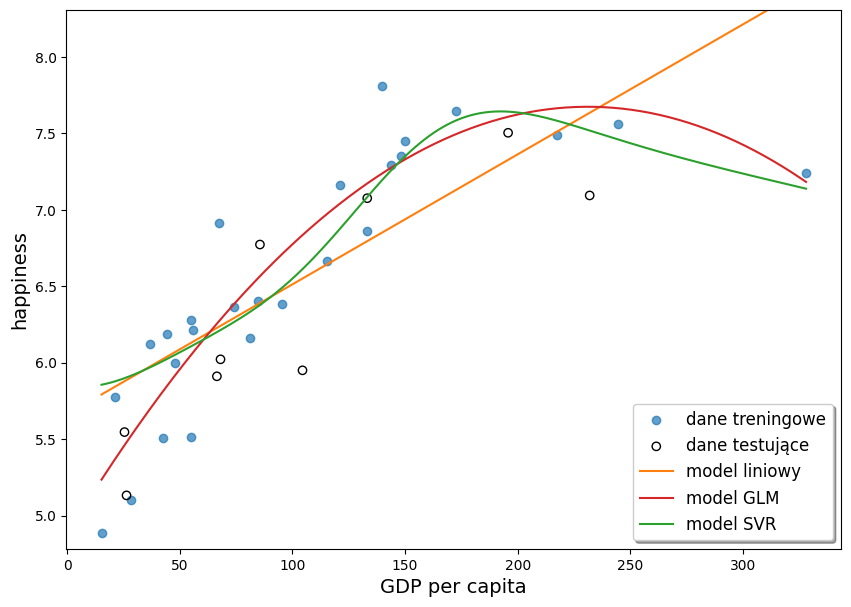

In [14]:
# Predykcje wszystkich modeli dla całego zakresów osi X
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))
y_svr_pred = model_svr.predict(os_x.reshape(-1,1))

# Wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.plot(os_x, y_svr_pred, label='model SVR', color='tab:green')
plt.xlabel(dane.columns[0], fontsize=14)
plt.ylabel(dane.columns[1], fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-0.1, Y.max()+0.5])
plt.show()

**Ćwiczenie 2:** Wykonaj wielokrotne dopasowania modeli do różnych podziałów zbioru danych na część do trenowania i do testowania. Wyciągnij wnioski. <br>
Jak oceniasz adekwatność każdego z modeli, tzn. czy poprawnie opisuje tendencje obserwowane w danych? <br>
Jaki kolejny model proponujesz rozważyć? <br>
Jak można ocenić adekwatność modelu w przypadku danych wielowymiarowych?

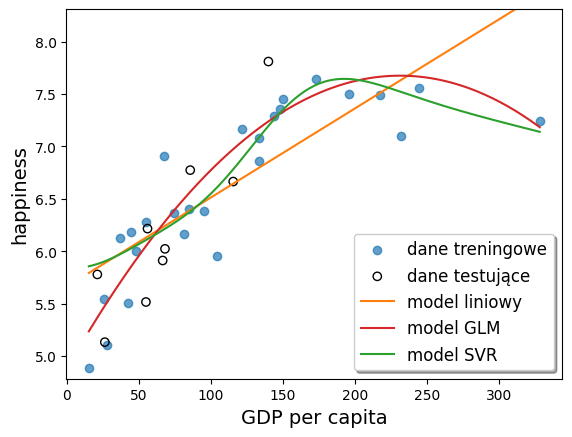

Błąd średniokwadratowy modelu liniowego: 0.25


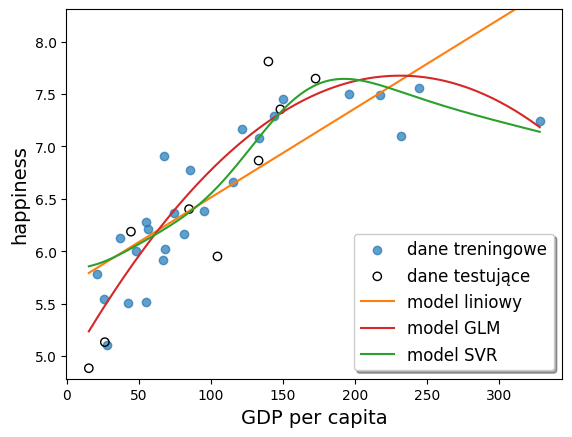

Błąd średniokwadratowy modelu liniowego: 0.406


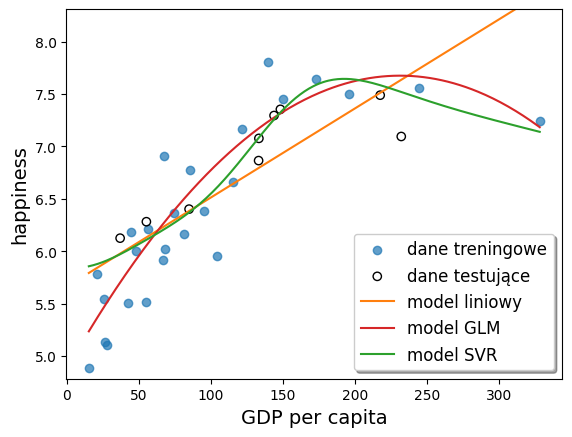

Błąd średniokwadratowy modelu liniowego: 0.123


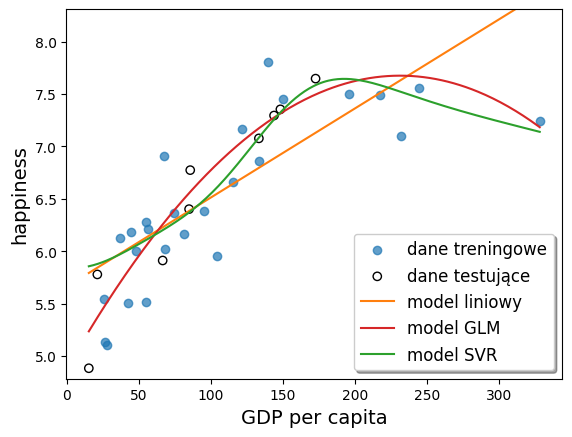

Błąd średniokwadratowy modelu liniowego: 0.251


In [17]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y)
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X, Y)

for X_train, X_test, Y_train, Y_test in zip([X_train1, X_train2, X_train3, X_train4],
                                            [X_test1, X_test2, X_test3, X_test4],
                                            [Y_train1, Y_train2, Y_train3, Y_train4],
                                            [Y_test1, Y_test2, Y_test3, Y_test4]):
    model_lin = LinearRegression()
    model_lin.fit(X_train.reshape(-1,1), Y_train)
    model_GLM = LinearRegression()
    model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), Y_train)
    model_svr = SVR(kernel='rbf', gamma='scale', C=1)
    model_svr.fit(X_train.reshape(-1,1), Y_train)
    plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
    plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
    plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
    plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
    plt.plot(os_x, y_svr_pred, label='model SVR', color='tab:green')
    plt.xlabel(dane.columns[0], fontsize=14)
    plt.ylabel(dane.columns[1], fontsize=14)
    plt.legend(fontsize=12, shadow=True, loc='lower right')
    plt.ylim([Y.min()-0.1, Y.max()+0.5])
    plt.show()


### Wykorzystanie SVM do zadania klasyfikacji na podstawie zbioru Iris
W celu przetestowania maszyny wektorów nośnych na problemie klasyfikacji, pobierzmy zbiór Iris.

Zbiór danych Iris zawiera pomiary cech trzech różnych gatunków roślin z rodzaju kosaciec (ang. iris). Zbiór ten zawiera cztery cechy dla każdego z 150 obserwowanych kwiatów - długość i szerokość działek kielicha oraz płatków oraz długość i szerokość słupka.

Wszystkie wartości pomiarów zostały znormalizowane do jednostek centymetrów. Zbiór ten jest często wykorzystywany w zadaniach klasyfikacji i uczenia maszynowego jako przykład problemu wieloklasowej klasyfikacji.

<!-- . It contains measurements of physical features of three species of iris flowers: Iris setosa, Iris versicolor, and Iris virginica. The measurements include the length and width of the petals and sepals of each flower, which were collected by the statistician Ronald Fisher in 1936. The dataset has become a classic example of data analysis and machine learning due to its simplicity and versatility, and is commonly used for classification tasks, data visualization, and exploratory data analysis. -->

In [18]:
from sklearn import datasets
iris = datasets.load_iris()

Badania eksploracyjne mające na celu poznanie istoty problemu oraz zbadanie danych na jakich się opieramy to pierwszy krok do rozwiązania problemu

In [56]:
X = iris.data  # dane wejściowe
y = iris.target  # dane wyjściowe

**Ćwiczenie 3:** Wykonaj badania eksploracyjne (ang. exploratory data analysis) i odpowiedz na następujące pytania:
1) z jakich danych składają się dane wejściowe i dane wyjściowe?
2) jaka jest sumaryczna liczba próbek?
3) jaka jest liczba różnych klas kwiatów?
4) ile próbek zawiera każda z klas? Czy klasy są zbalansowane?
5) jakie są średnia i odchylenie standardowe cechy `petal width (cm)`?

In [30]:
print(f'{X=}\n{y=}') # X -> pewne cechy analizowanych obiektów, y -> sklasifikowane obiekty
print(f'{X.shape}') # X -> 150 obiektow, 4 cechy
print(f'{set(y)}') # y -> 3 klasy: 0, 1, 2
for i, count in enumerate(np.bincount(y)):
    print(f'{i}: {count}') # po 50 obiektow w kazdej klasie, zbalansowane
# print(f'{iris.feature_names}') # petal width znajduje sie na 4 pozycji
print(f'avg={np.mean(X[3], axis=0)}\nstd={np.std(X[3], axis=0)}')

X=array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9,

**Ćwiczenie 4:** Wykorzystaj metodę `train_test_split` i podziel zbiór danych na podzbiory treningowy oraz testowy w stosunku 75:25 z wykorzystaniem ziarna losowości o wartości 13 oraz wykorzystując przetasowanie (ang. shuffle) danych.


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

W sklearn modele klasyfikacji tworzymy w analogiczny sposób jak modele regresji.

In [58]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

Dobrą praktyką, zanim przekażemy dane do klasyfikatora, jest przeskalowanie ich.

Ma to na celu zapewnienie równego znaczenia każdej z cech. Z racji, iż SVM próbuje znaleźć optymalną granicę decyzyjną, która separuje klasy w przestrzeni cech, to jeśli cechy wejściowe używają różnych skali, to niektóre z nich mogą mieć większy zakres wartości niż inne. To może powodować, że SVM położy większy nacisk na cechy o większych skalach, a więc nierównomiernie uwzględnieni (bardziej skupi się) poszczególne z nich w procesie uczenia.



W tym celu wykorzystajmy API sklearn, a dokładniej klasę `StandardScaler`. Podobnie jak w przypadku modeli - tutaj również wywołujemy funkcję `fit()`.

In [59]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

**Ćwiczenie 5:** jak zmieniły się wartości poszczególnych cech po skalowaniu? 

In [60]:
columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X_train_df = pd.DataFrame(X_train_sc, columns=columns)
print(X_train_df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -1.018271          1.286460          -1.393389         -1.362177
1            -0.773010          2.435452          -1.335503         -1.496476
2            -0.037227         -0.781725           0.748378          0.920908
3             0.208034          0.826864           0.401064          0.518011
4             1.066448          0.137469           0.516836          0.383712
..                 ...               ...                ...               ...
107           0.330664         -0.551926           0.111637          0.115114
108          -1.140902         -1.241321           0.401064          0.652310
109          -0.037227          2.205654          -1.509160         -1.362177
110          -0.037227         -1.011523           0.111637         -0.019186
111           1.556970         -0.092330           1.211463          1.189507

[112 rows x 4 columns]


Podobnie jak w przypadku modeli regresji funkcja `fit()` jest używana do trenowania modelu na danych treningowych problemu klasyfikacji.

Funkcja `predict()` zwraca przewidywane etykiety dla danych testowych, które wcześniej nie były używane do dopasowania modelu.

In [61]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f'{y_pred=}')

y_pred=array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])


### Ocena jakości modelu klasyfikacji

Na poprzednich laboratoriach poznaliśmy sposoby oceny jakości predykcji modelu regresji. W zagadnieniu klasyfikacji również istnieje szereg metod pozwalających na takową ocenę - stosować je będziemy w zależnosci od problemu.

Tablica pomyłek (ang. confusion matrix) to macierz $N\times N$, gdzie $N$ to liczba klas docelowych. Jest ona używana do oceny wyników modeli klasyfikacyjnych. Jedna z osi przedstawia prawdziwe klasy, podczas gdy druga - predykowane przez nasz model. Wartości w odpowiednich komórkach mówią o tym ile próbek zostało zaklasyfikowanych w dany sposób.

Intuicyjnie dążymy do tego, by otrzymać jak najwiecęj wartości po przekątnej - tzn. by jak najwięcej klas było predykowanych jako te właściwe.

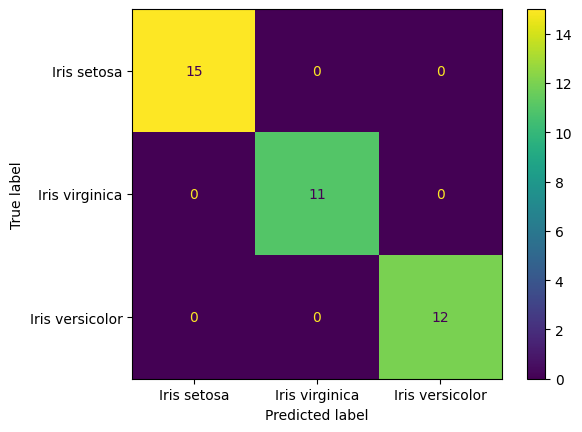

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=[clf.classes_])
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
   display_labels=["Iris setosa", "Iris virginica", "Iris versicolor"],
)
disp.plot()

plt.show()

**Ćwiczenie 6:** Opisz jakie błędy popełnił klasyfikator.

In [ ]:
# wszystkie dane zostaly poprawnie sklasyfikowane  

Bazując na tablicy pomyłek jesteśmy w stanie policzyć różne metryki klasyfikacji. Najbardziej podstawową z nich jest dokładność (ang. accuracy).

\begin{equation}
\text{Dokładność} = \frac{\text{liczba poprawnie zaklasyfikowanych próbek}}{\text{liczba wszystkich próbek}}
\end{equation}

**Ćwiczenie 7**: wykorzystując bibliotekę sklearn (moduł `sklearn.metrics`) oblicz wartość dokładności dla predykcji zbioru testowego Iris. Czy wyniki osiągnięte przez klasyfikator można uznać za dobre?

In [63]:
import sklearn.metrics
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
print(f'{accuracy=}')

accuracy=1.0


Podstawą poprawnego wykonania zadania jest dobranie odpowiednich narzędzi - dokładność nie zawsze jest najlepszą metryką. Chcąc przedstawić bardziej miarodajne wnioski warto jest używać metryk takich jak precyzja (ang. precision), czułość (ang. recall) lub F1-score - przeczytaj o nich więcej w domu.

### Wizualizacja parametrów SVM

Poniższy kod wizualizuje granice decyzyjne dla różnych przykładów SVMów. Poeksperymentuj poprzez podanie różnych wartości parametrów.


Oryginalna implementacja poniższego kodu znajduje się [tutaj](https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py).

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Chcemy analizować klasyfikację tylko pomiędzy dwiema klasami
X = X[y != 0, :2]
y = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, shuffle=True)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

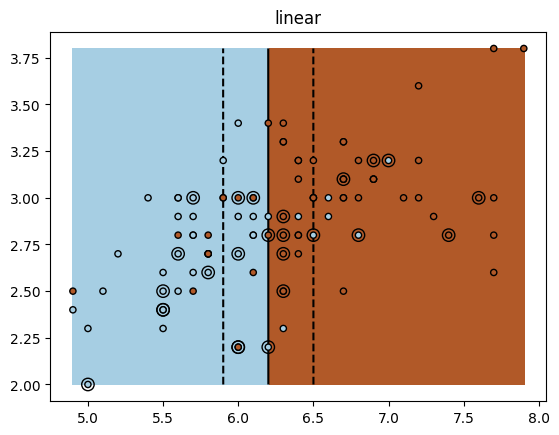

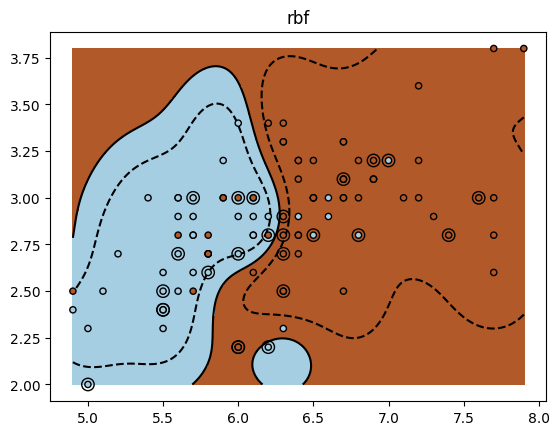

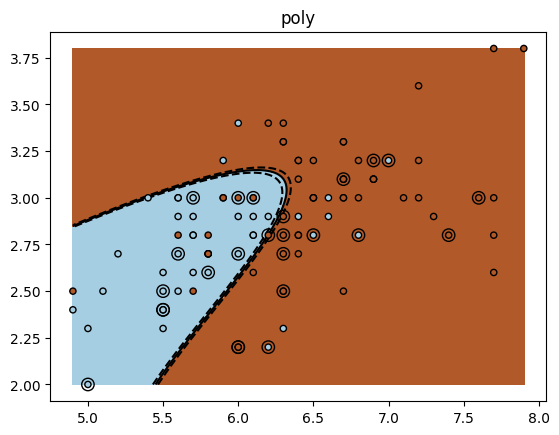

In [23]:
# Podstawowe parametry do modyfikacji, więcej parametrów znajdziesz na https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
C = 1.0
gamma = 10.0
from sklearn.preprocessing import StandardScaler


# Wygeneruj wizualizację dla każdego z modeli
for kernel in ("linear", "rbf", "poly"):
    
    clf = svm.SVC(kernel=kernel, gamma=gamma, C=C)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()

    # Zwizualizuj wszystkie próbki
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Zaznacz okręgiem dane testowe
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Wykreśl granicę decyzyjną
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()

**Ćwiczenie 8**: Poznaliśmy do tej pory różne parametry maszyny wektorów nośnych (C, gamma) oraz operacje które warto wykonać przed przekazaniem danych do modelu (skalowanie danych). Sprawdź wpływ ww. czynników na wyniki SVM na zbiorze Iris. Pamiętaj o zachowaniu miarodajności wyników poprzez użycie tych samych zbiorów oraz losowości!

C:\Users\dziun\AppData\Local\Temp\ipykernel_22720\1010443340.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


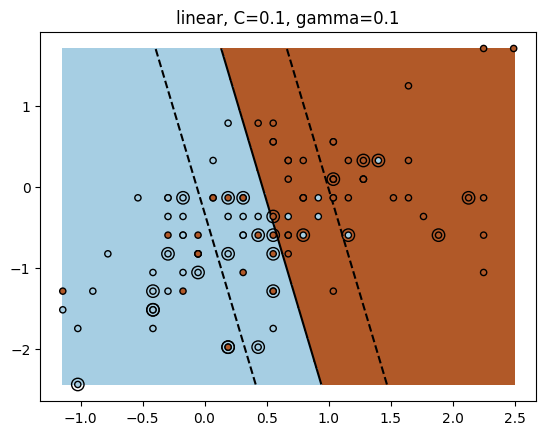

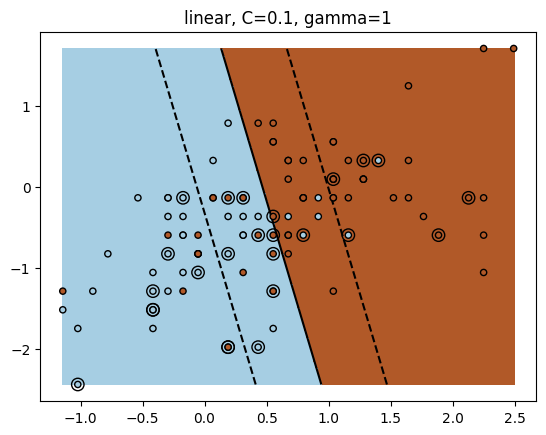

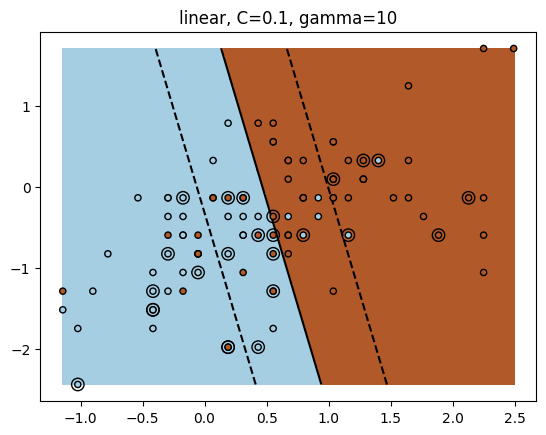

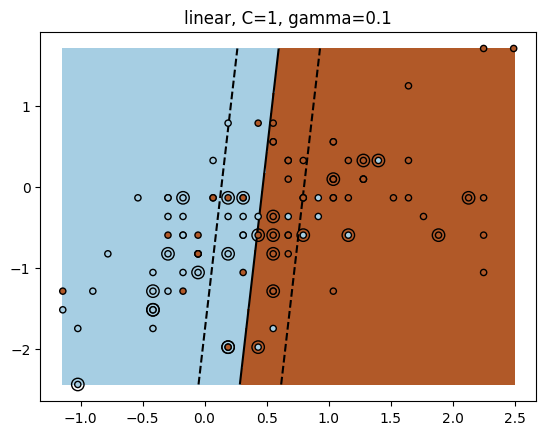

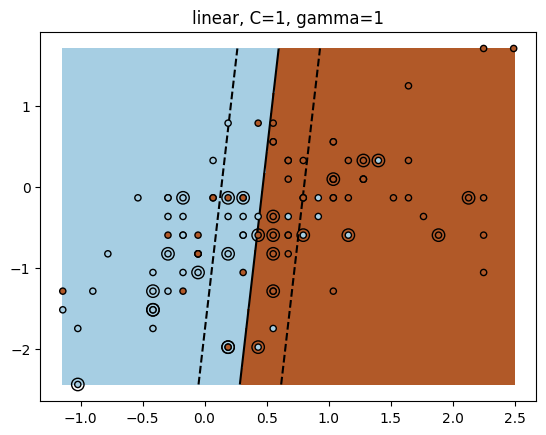

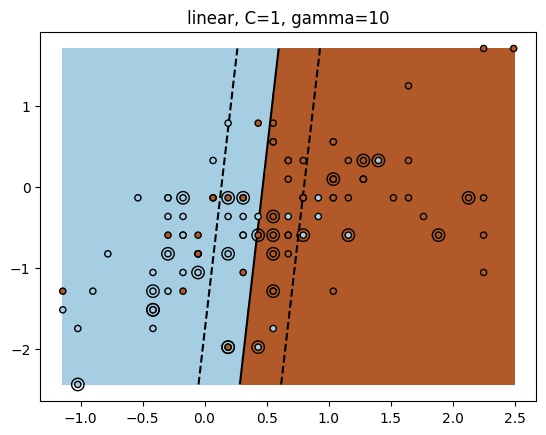

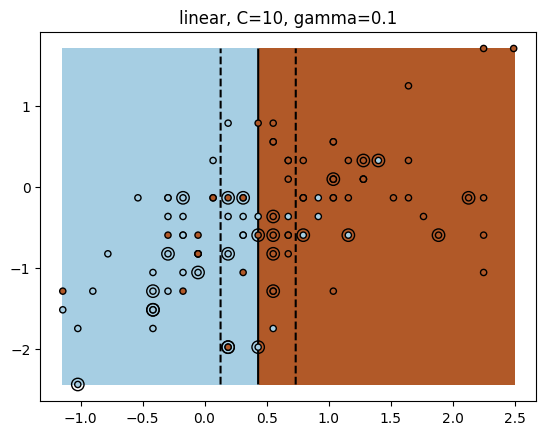

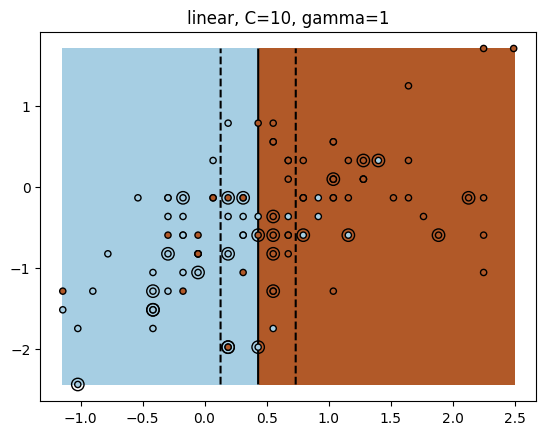

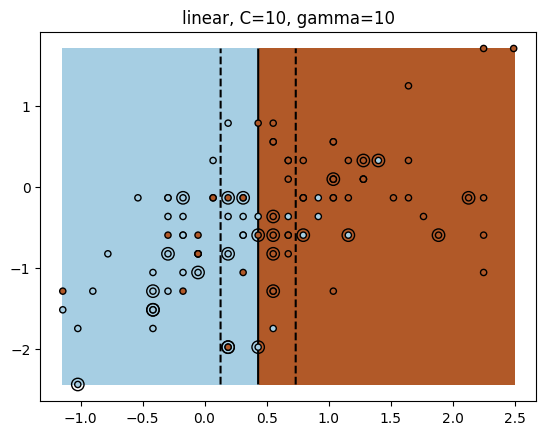

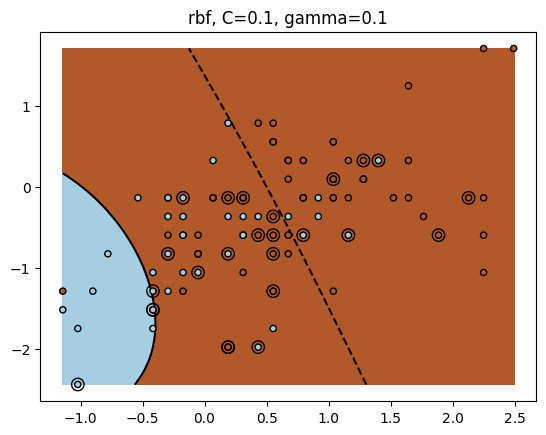

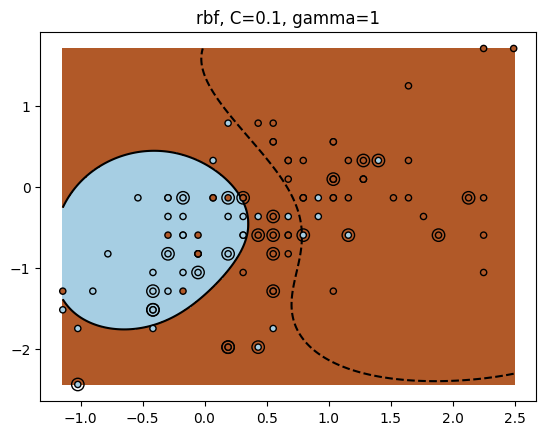

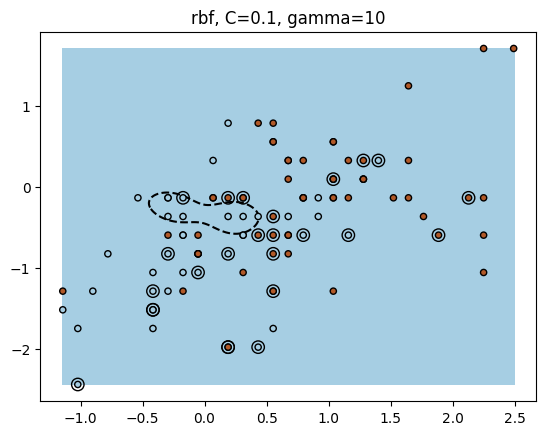

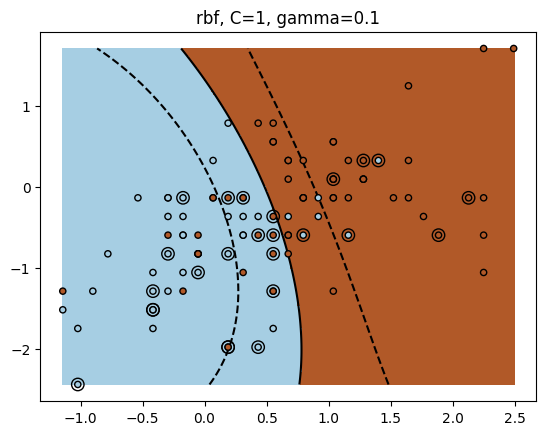

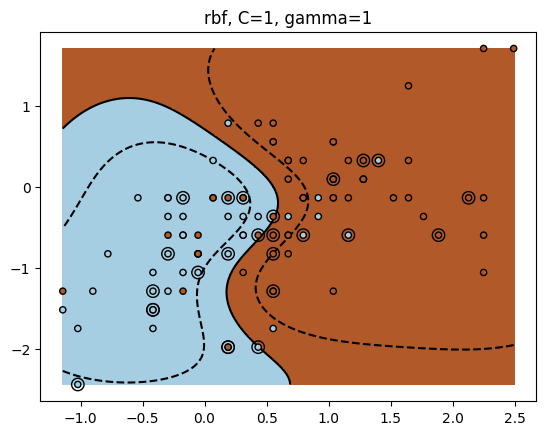

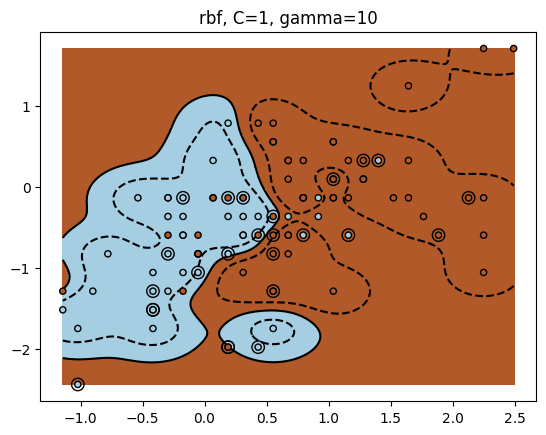

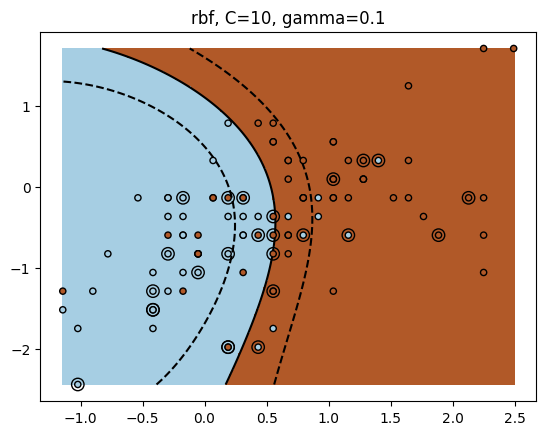

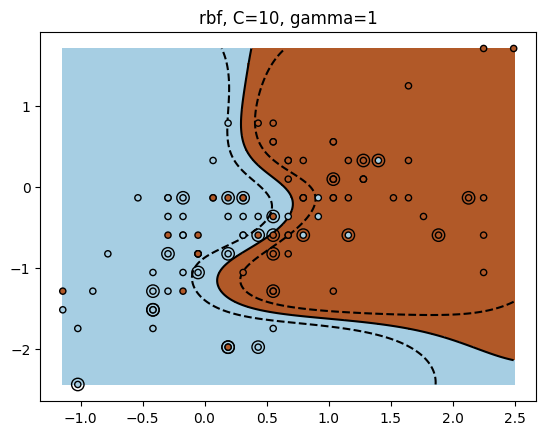

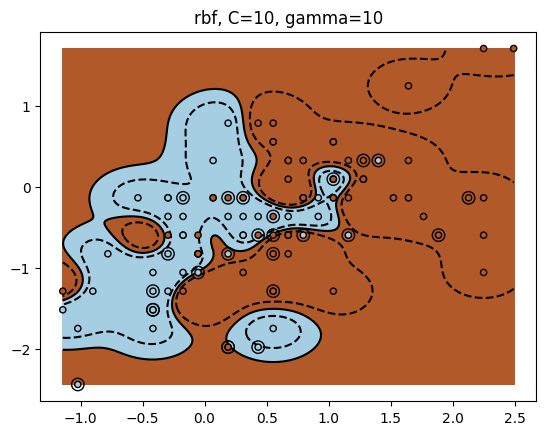

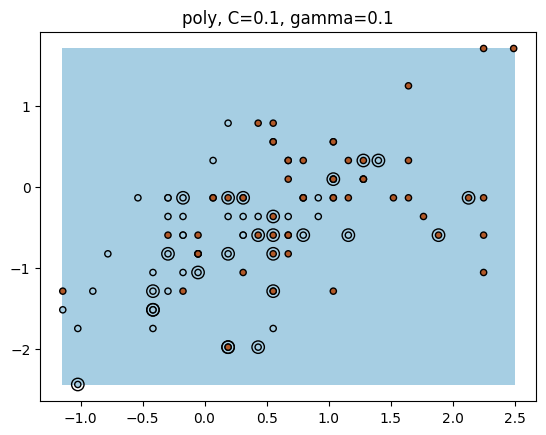

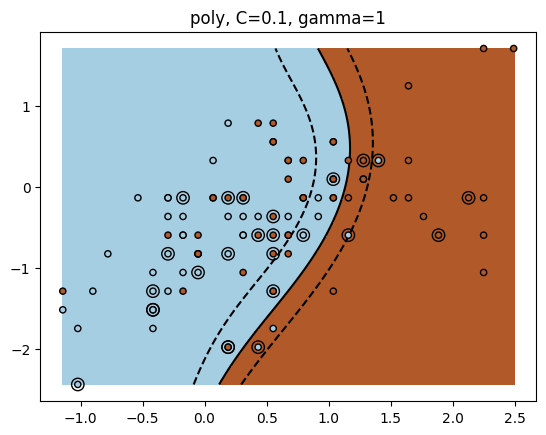

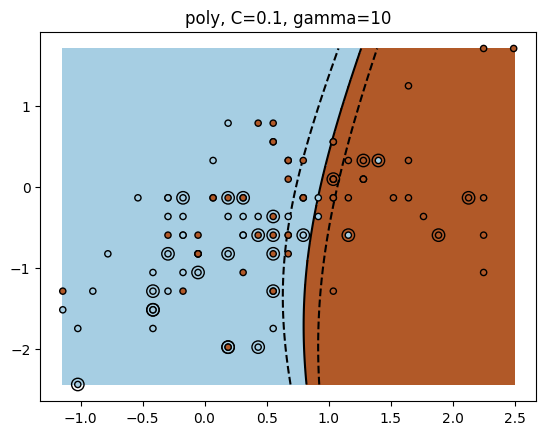

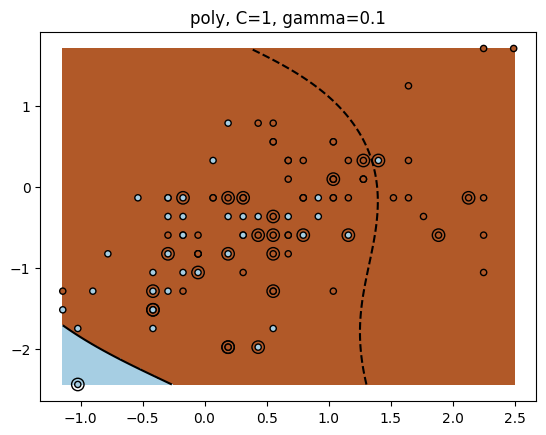

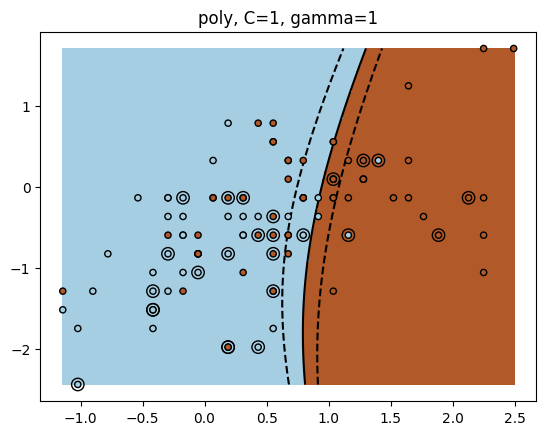

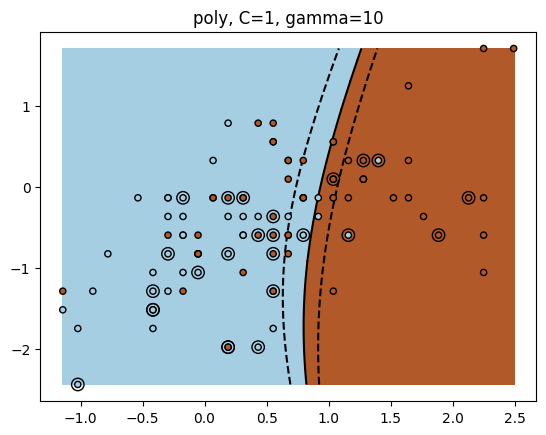

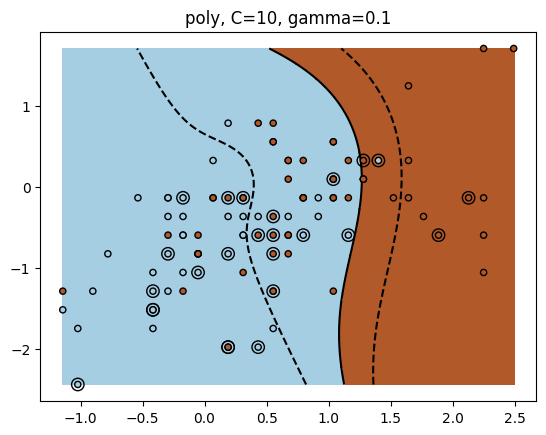

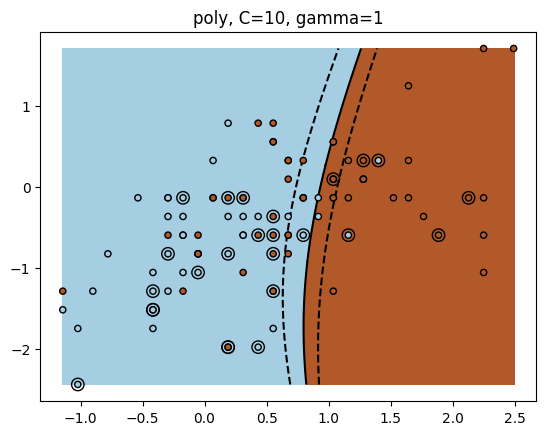

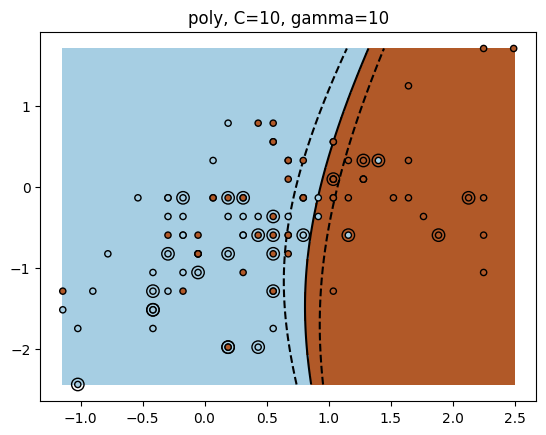

In [2]:
import numpy as np
from sklearn import datasets, svm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from itertools import product

sc = StandardScaler()
iris = datasets.load_iris()
X = iris.data
X = sc.fit_transform(X)
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]



# Wygeneruj wizualizację dla każdego z modeli
for kernel in ("linear", "rbf", "poly"):
    for C,gamma in product([0.1, 1, 10], [0.1, 1, 10]):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42,shuffle=True)
        y_train = y_train.astype(float)
        y_test = y_test.astype(float)

        clf: SVC = svm.SVC(kernel=kernel, gamma=gamma, C=C,degree=3)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        plt.figure()
        plt.clf()

        # Zwizualizuj wszystkie próbki
        plt.scatter(
            X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
        )

        # Zaznacz okręgiem dane testowe
        plt.scatter(
            X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
        )

        plt.axis("tight")
        x_min = X[:, 0].min()
        x_max = X[:, 0].max()
        y_min = X[:, 1].min()
        y_max = X[:, 1].max()

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(
            XX,
            YY,
            Z,
            colors=["k", "k", "k"],
            linestyles=["--", "-", "--"],
            levels=[-0.5, 0, 0.5],
        )
        plt.title(f'{kernel}, {C=}, {gamma=}')


    
plt.show()